In [1]:
from selenium import webdriver
from bs4 import BeautifulSoup
import time
from bs4.element import Tag
import numpy as np
import pandas as pd


In [58]:
def get_links_from_google_search(goog_url, target_links=100):
    '''
    Given a Google search string, returns approx target_links of links
    Parameters:
    ----------
    google_url (str): a google search string. The easiest way to get the string is to enter a search in google, run the search, and copy
    the search string in the address bar. Replace start=0 with start={bundle}.
    target_links (int)
    Returns:
    -------
    links (list): a list of links 
    '''
    page_bundles = list(range(0,target_links,10))
    links = []
    driver = webdriver.Firefox()
    for bundle in page_bundles:
        time.sleep(30) # slow requests down to keep google from getting upset
        google_url = goog_url
        driver.get(google_url)
        soup = BeautifulSoup(driver.page_source,'lxml')
        result_div = soup.find_all('div', attrs={'class': 'g'})
        for r in result_div:
            # Checks if each element is present, else, raise exception
            try:
                link = r.find('a', href=True)
                title = None
                title = r.find('h3')

                if isinstance(title,Tag):
                    title = title.get_text()

                description = None
                description = r.find('span', attrs={'class': 'st'})

                if isinstance(description, Tag):
                    description = description.get_text()

            # Check to make sure everything is present before appending
                if link != '' and title != '' and description != '':
                    links.append(link['href'])
                
            # Next loop if one element is not present
            except Exception as e:
                print(e)
                continue
    return(links)


In [59]:
# Call to get links for the targrt search term. The easiest way to change the search is to type a search
# in google, copy and paste below. Convert to an f string, find start=0 in the string and change it to start={bundle}.

us_google_url=f"https://www.google.com/search?q=croissant+baking+temp&client=ubuntu&hs=bju&channel=fs&tbas=0&sxsrf=ALeKk01tinXVzgWJgZhSeeUfjrJd4FW4oA:1597161338731&ei=er8yX--YLLi50PEPiYu28A4&start={bundle}&sa=N&ved=2ahUKEwjvvfnRwZPrAhW4HDQIHYmFDe4Q8NMDegQIDhBA&biw=1920&bih=969"
fr_google_url=f"https://www.google.fr/search?q=temp%C3%A9rature+cuisson+croissant&ei=0PEzX4C2PMXk-gTv_ImwCA&start={bundle}&sa=N&ved=2ahUKEwiA3szk5ZXrAhVFsp4KHW9-AoYQ8NMDegQIDRBC&biw=1848&bih=942"
uk_google_url=f"https://www.google.co.uk/search?q=croissant+temperature&ei=OPQzX8T0KMj4-gSnn5moBw&start={bundle}&sa=N&ved=2ahUKEwjE8JaK6JXrAhVIvJ4KHadPBnUQ8NMDegQIDhA_&biw=1848&bih=942"

links = get_links_from_google_search(fr_google_url, 150)

NameError: name 'bundle' is not defined

In [187]:
print(links)

['https://chefsimon.com/gourmets/chef-simon/recettes/croissants-et-pains-au-chocolat-decoupe-et-cuisson', 'https://www.marmiton.org/recettes/recette_croissants-au-beurre-maison_41321.aspx', 'https://cuisine.journaldesfemmes.fr/recette/305677-croissants-au-beurre', 'https://www.iletaitunefoislapatisserie.com/2014/02/les-croissants-maison.html', 'https://www.meilleurduchef.com/en/recipe/pain-au-chocolat-chocolate-croissant.html', 'https://lacuisinedannie.20minutes.fr/recette-croissants-facon-boulangerie-355.html', 'http://www.lamourdupain.com/blogue/croissants-congeles', 'https://zeste.ca/recettes/croissants-au-beurre-1', 'https://fr.wikibooks.org/wiki/Livre_de_cuisine/Croissant', 'https://www.aufeminin.com/recettes/les-croissants-s641549.html', 'http://www.mylittlerecettes.com/cap-patissier-croissants-pate-levee-feuilletee/', 'https://www.ricardocuisine.com/recettes/8475-croissants-au-beurre', 'https://www.ricardocuisine.com/en/recipes/8475-butter-croissants', 'https://www.youtube.com/w

In [191]:
filename = 'croissant-google-uk-links.txt'
with open(filename, 'w') as file_obj:
    for link in links:
        file_obj.write(f'{link}\n')

In [44]:
url_list = pd.read_csv('croissant-google-fr-links.txt', header=None)

In [53]:
import requests
import re
from bs4 import BeautifulSoup
import bs4
# url_list = links

fr_bake_temps = []
for url in url_list[0]:
    r = requests.get(url, allow_redirects=False)
    if r.status_code == 200:
        soup = BeautifulSoup(r.content, 'html')
        baking_instructions_section = soup.find_all(text = re.compile('cuisson', re.I))
        for i in baking_instructions_section:
            if type(i) == bs4.element.NavigableString:
                pattern = r'([A-Z][^.]*four[^.]*\d{3}[^.]*[.])'
                pattern_match  = re.compile(pattern)
                match_result = pattern_match.search(i)
                if match_result:
                    fr_bake_temps.append(match_result[1])





SSLError: HTTPSConnectionPool(host='www.neuhauser.fr', port=443): Max retries exceeded with url: /produits/pain-au-chocolat-4/130 (Caused by SSLError(SSLCertVerificationError(1, '[SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: unable to get local issuer certificate (_ssl.c:1076)')))

In [49]:
us_df = pd.DataFrame(us_bake_temps)
us_df.to_csv('us-bake-sentences.csv')

In [51]:
uk_df = pd.DataFrame(bake_temps)
uk_df.to_csv('uk-bake-sentences.csv')

NameError: name 'bake_temps' is not defined

In [211]:
import csv
filename = 'croissant-bake-temps-uk.csv'
with open(filename, 'w') as file_obj:
    wr = csv.writer(file_obj)
    wr.writerow(bake_temps)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f8ca2bd82d0>]],
      dtype=object)

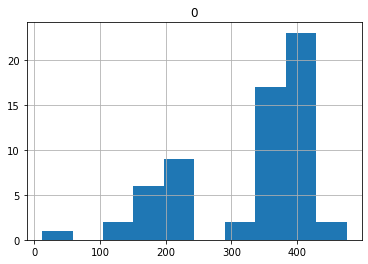

In [195]:
temps = [int(t) for t in bake_temps]
temps_ = pd.DataFrame(temps)
temps_.hist()

In [80]:
def re_match_target(trg:str, to_match:str) -> bool:
    """ Returns bool if to_match pattern string in target, set to_match var for another match """
    pattern  = re.compile(f'{to_match}', re.I)
    return bool(pattern.search(trg))

In [84]:
re_match_target('preheat oven to 400', 'Preheat')

True

In [101]:
valid_url

42